<h2>Linear Regression: Wine Quality Datasets

Making use of the linear regression skills learnt working with the weather dataset.

<h4>Importing + Combining Data

In [88]:
import pandas as pd
import numpy as np

In [89]:
red_data = pd.read_csv("winequality-red.csv")
white_data = pd.read_csv("winequality-white.csv")

#Add extra column to distinguish between 'Red' and 'White' for subsquent data combination.

red_data = red_data.assign(color="Red")
white_data = white_data.assign(color="White")

In [90]:
print(red_data.shape)
red_data.head(5)

(1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [91]:
print(white_data.shape)
white_data.head(5)

(4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


Both data sets have the same columns. Safe to concatenate them

In [92]:
# Combine red and white wine data
data = pd.concat([red_data, white_data], ignore_index=True)
print(data.shape)
data.head(5)

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [93]:
# Based on output of '.shape', the dataframes are now combined (more rows)

<h4>Exploring + Cleaning the Data

In [94]:
data.info()
# Mostly 'float' based data. 1 row is an object (string in this case)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [95]:
data.describe()
# Lots of rows. Will be good for training.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [96]:
data.isnull().sum()
# Appears to be no null values. No need for cleaning (deletion or imputation)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [97]:
# Display the number of unique and duplicate rows in 'data' (no modifications)
unique_rows = data.drop_duplicates().shape[0]
duplicate_rows = len(data) - unique_rows
percentage_duplicates = round(duplicate_rows*100/len(data),0)

print(f"Total rows: {len(data)}")
print(f"Unique rows: {unique_rows}")
print(f"'Duplicate' rows: {duplicate_rows}%")
print(f"Percentage duplicates: {percentage_duplicates}%")

Total rows: 6497
Unique rows: 5320
'Duplicate' rows: 1177%
Percentage duplicates: 18.0%


In [98]:
# There are lots of rows. We can afford to drop the duplicates

data = data.drop_duplicates()
print(data.shape)
data.head(5)

(5320, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red


In [99]:
# Converting any non-numerical data into a number.

data.loc[:, 'color_index'] = data['color'].astype(dtype='category').cat.codes
data = data.drop(['color'],axis=1)

In [100]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_index
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


<h4>Initial Data Visualisation + Exploratory Data Analysis (EDA)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

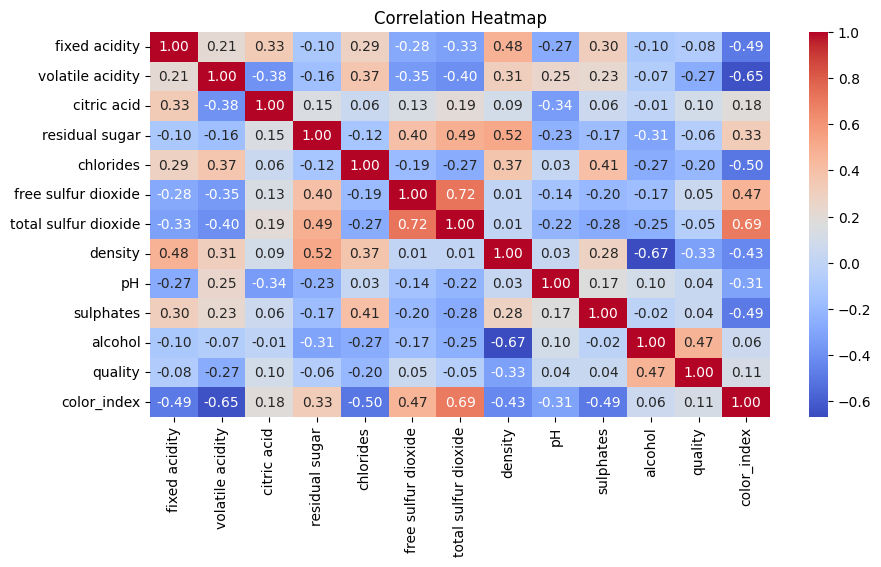

In [102]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

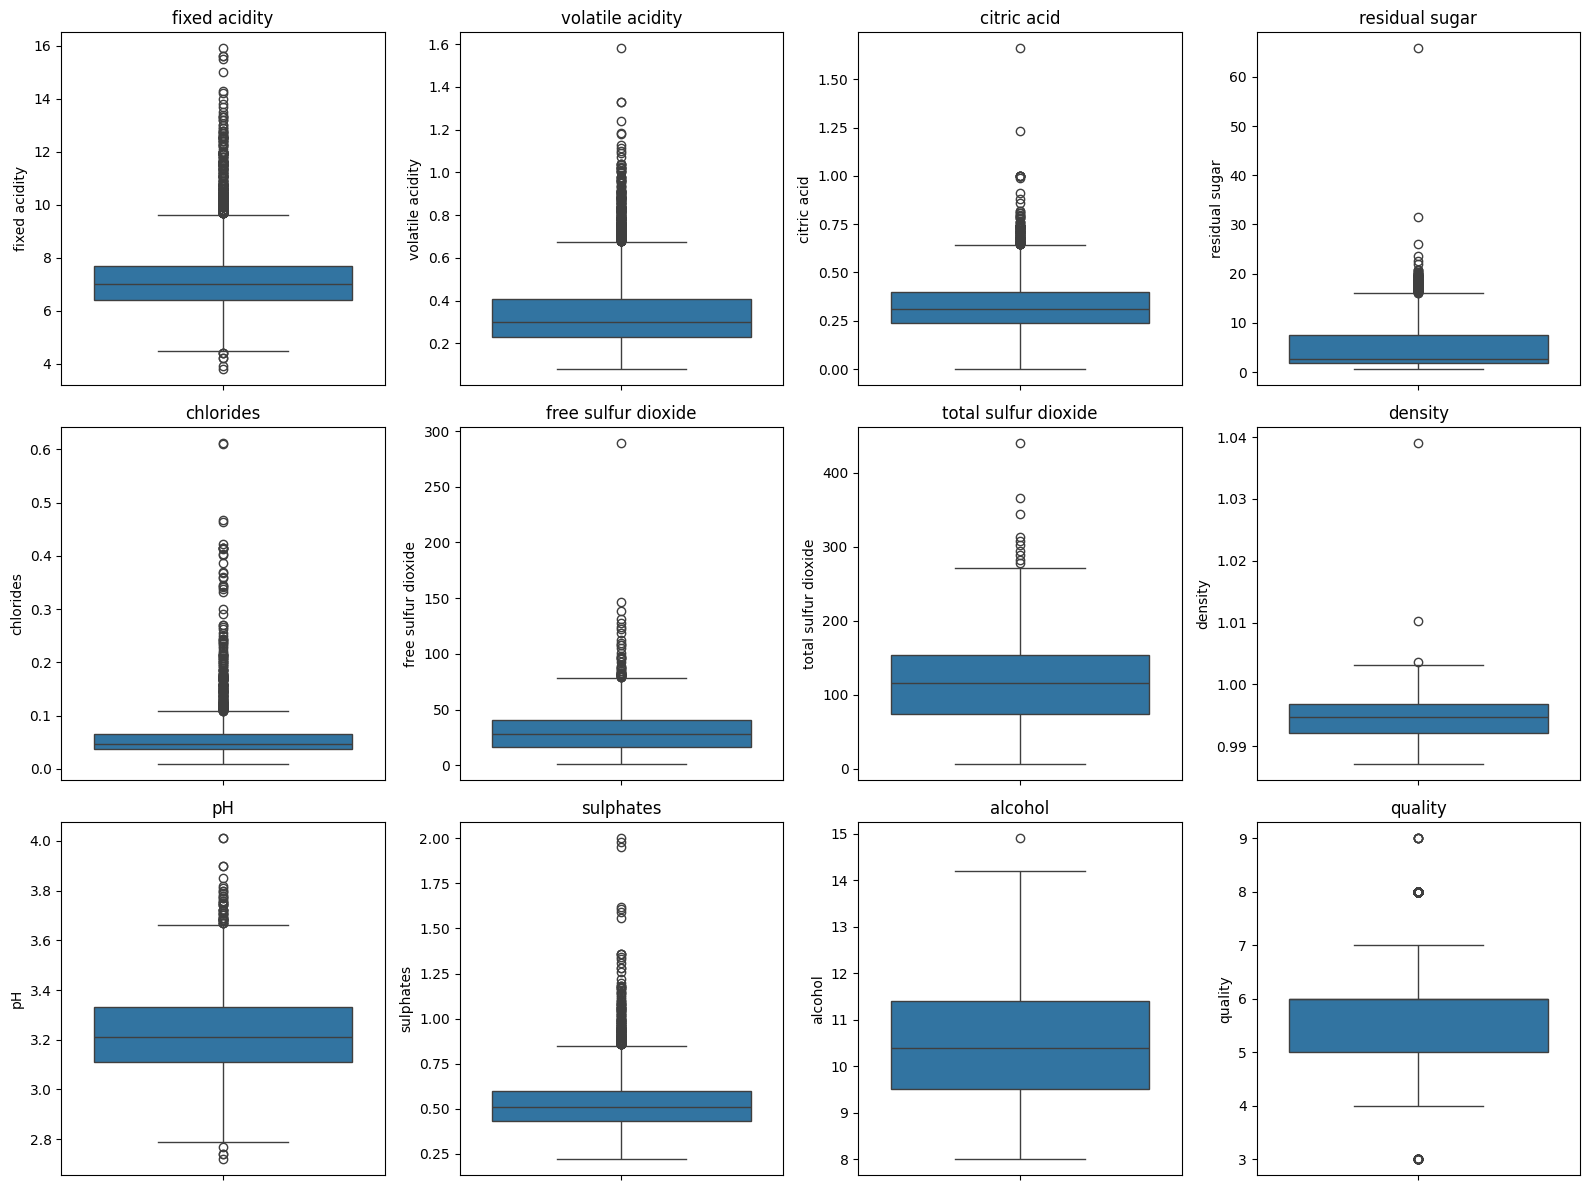

In [103]:
# Spotting outliers: Boxplots
boxplot_data = numeric_data.drop(columns="color_index",axis=1)

n_cols = 4   
n = len(boxplot_data.columns)
n_rows = int(n / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(boxplot_data.columns, 1): #list(enumerate(...)) returns a list [(0,A), (1,B), (2,C), ...]
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=boxplot_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [104]:
# There appears to be quite a few outliers. It may be best to use robust scaler instead of standard scaler for the scaling

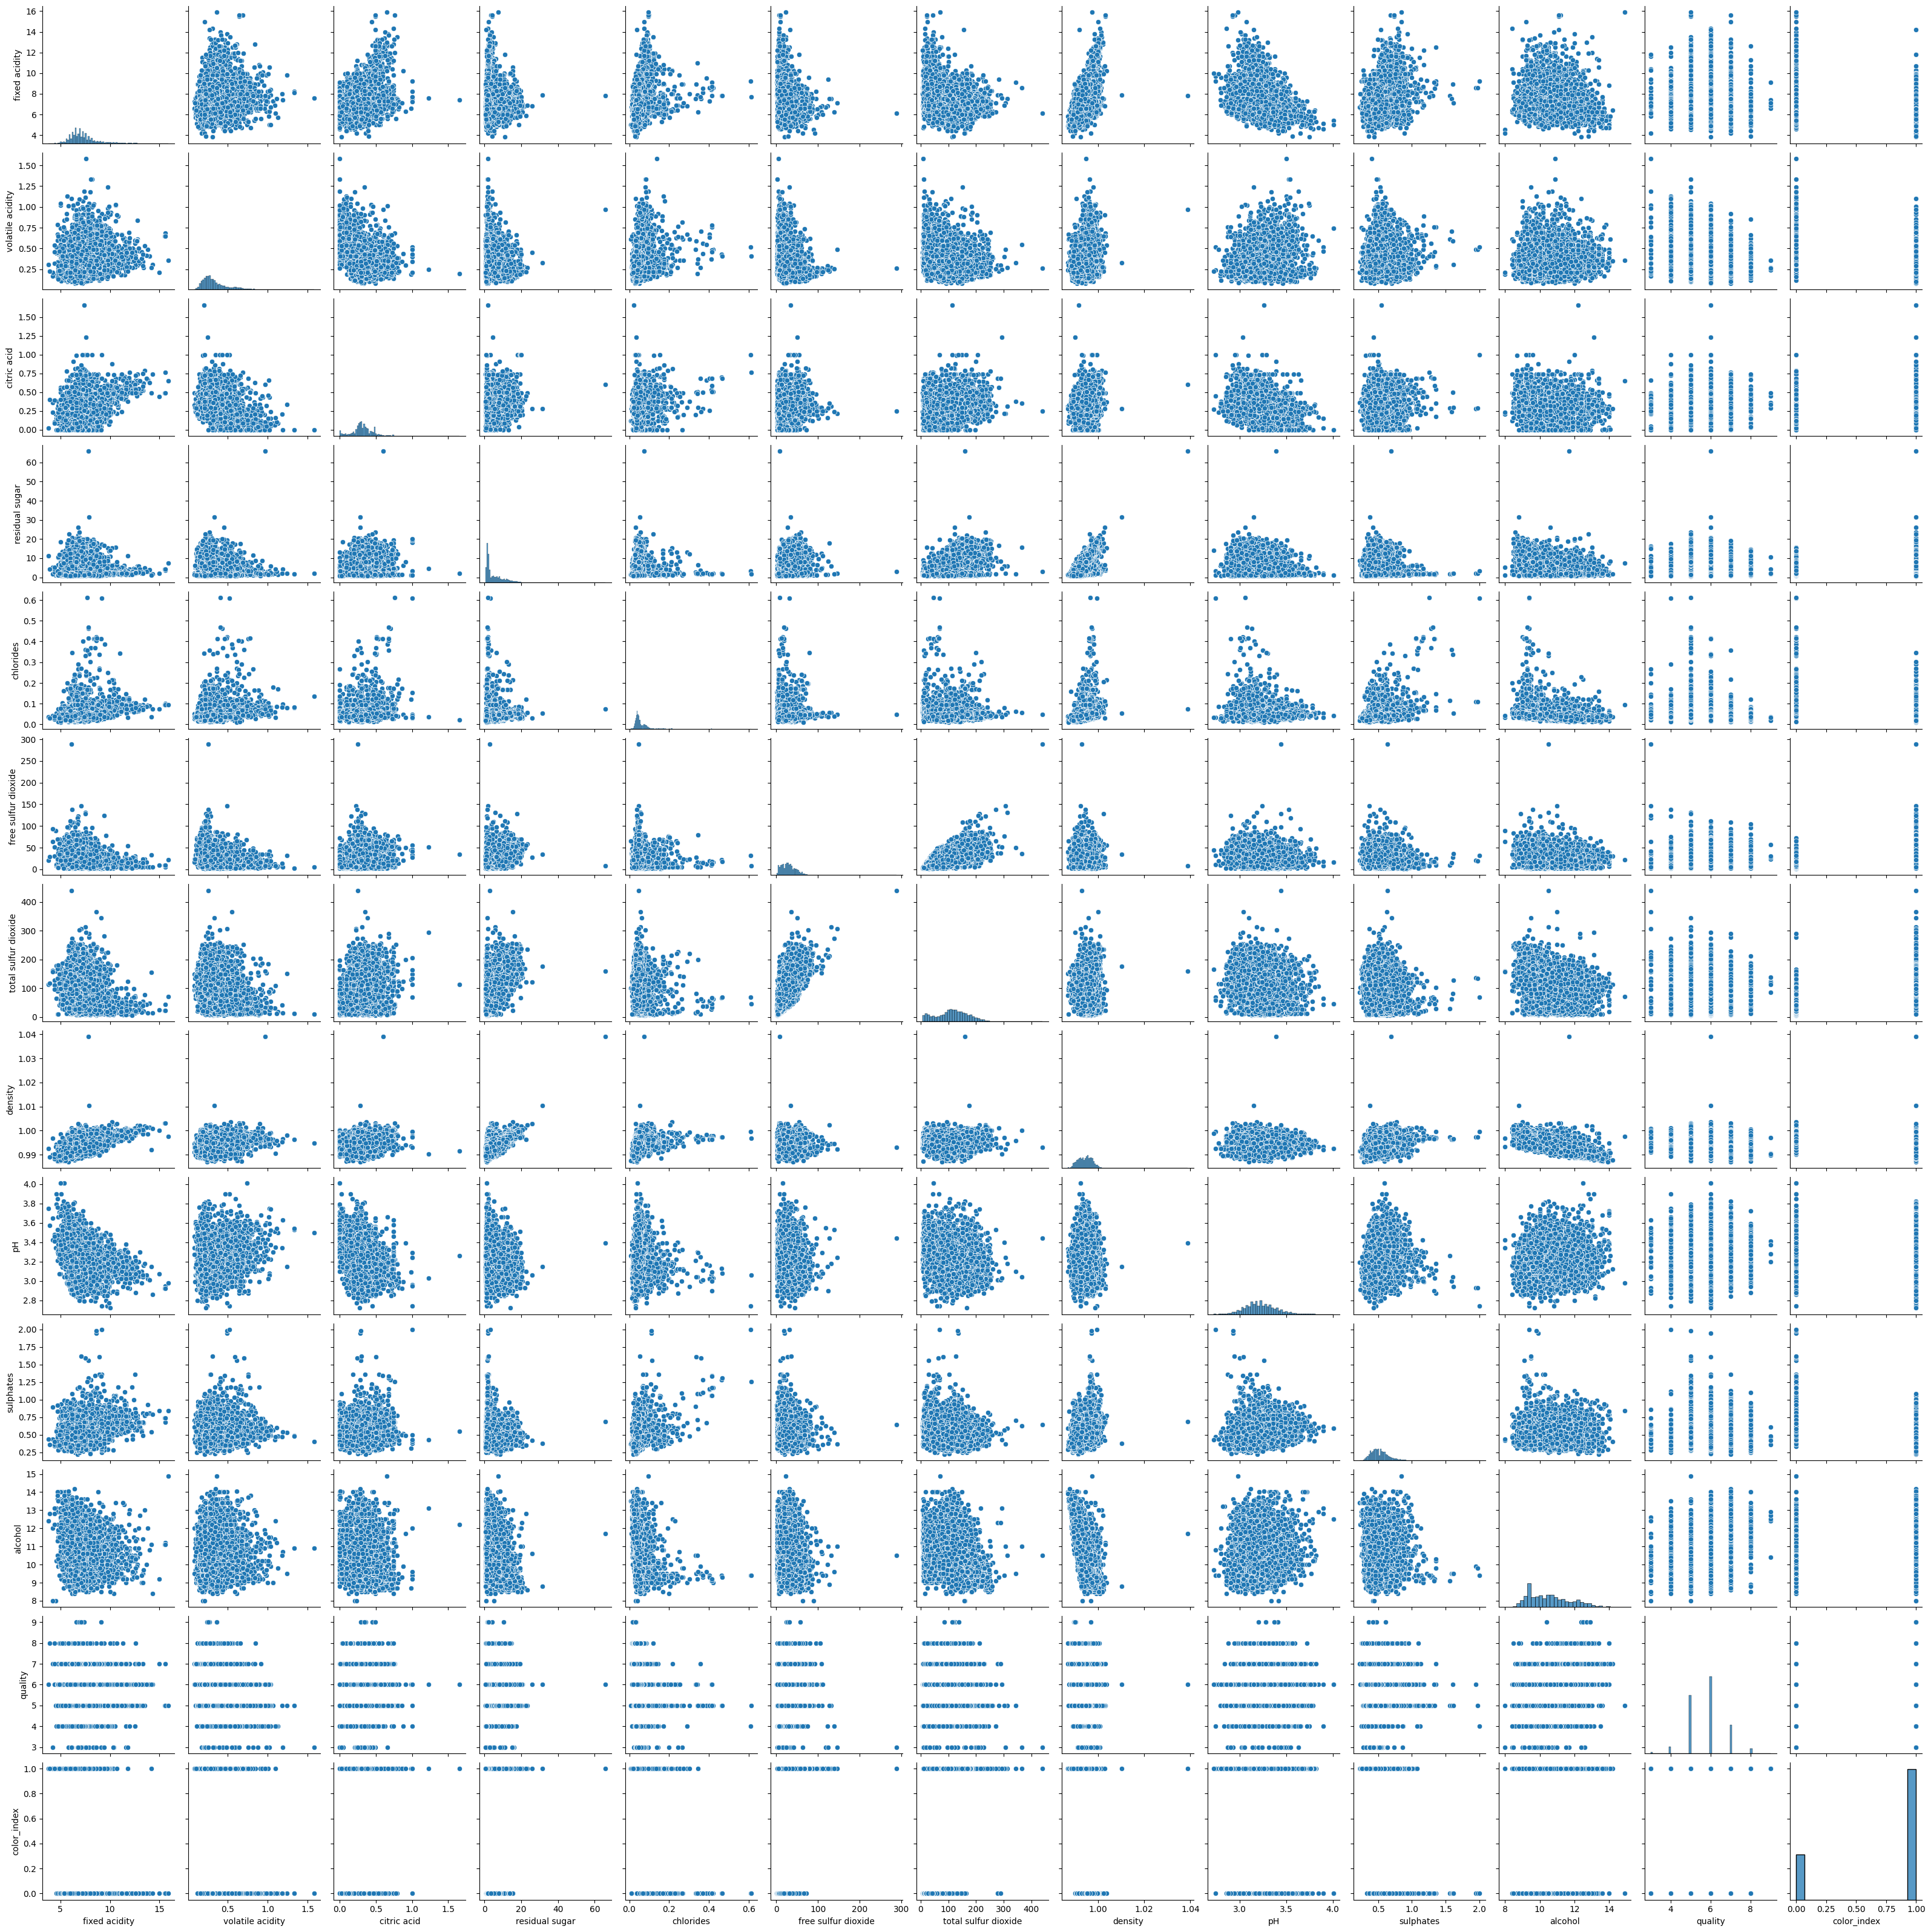

In [105]:
# Initial correlation visualisation:
sns.pairplot(numeric_data)
plt.show()
# A few of the columns appear to be correlated based on shape

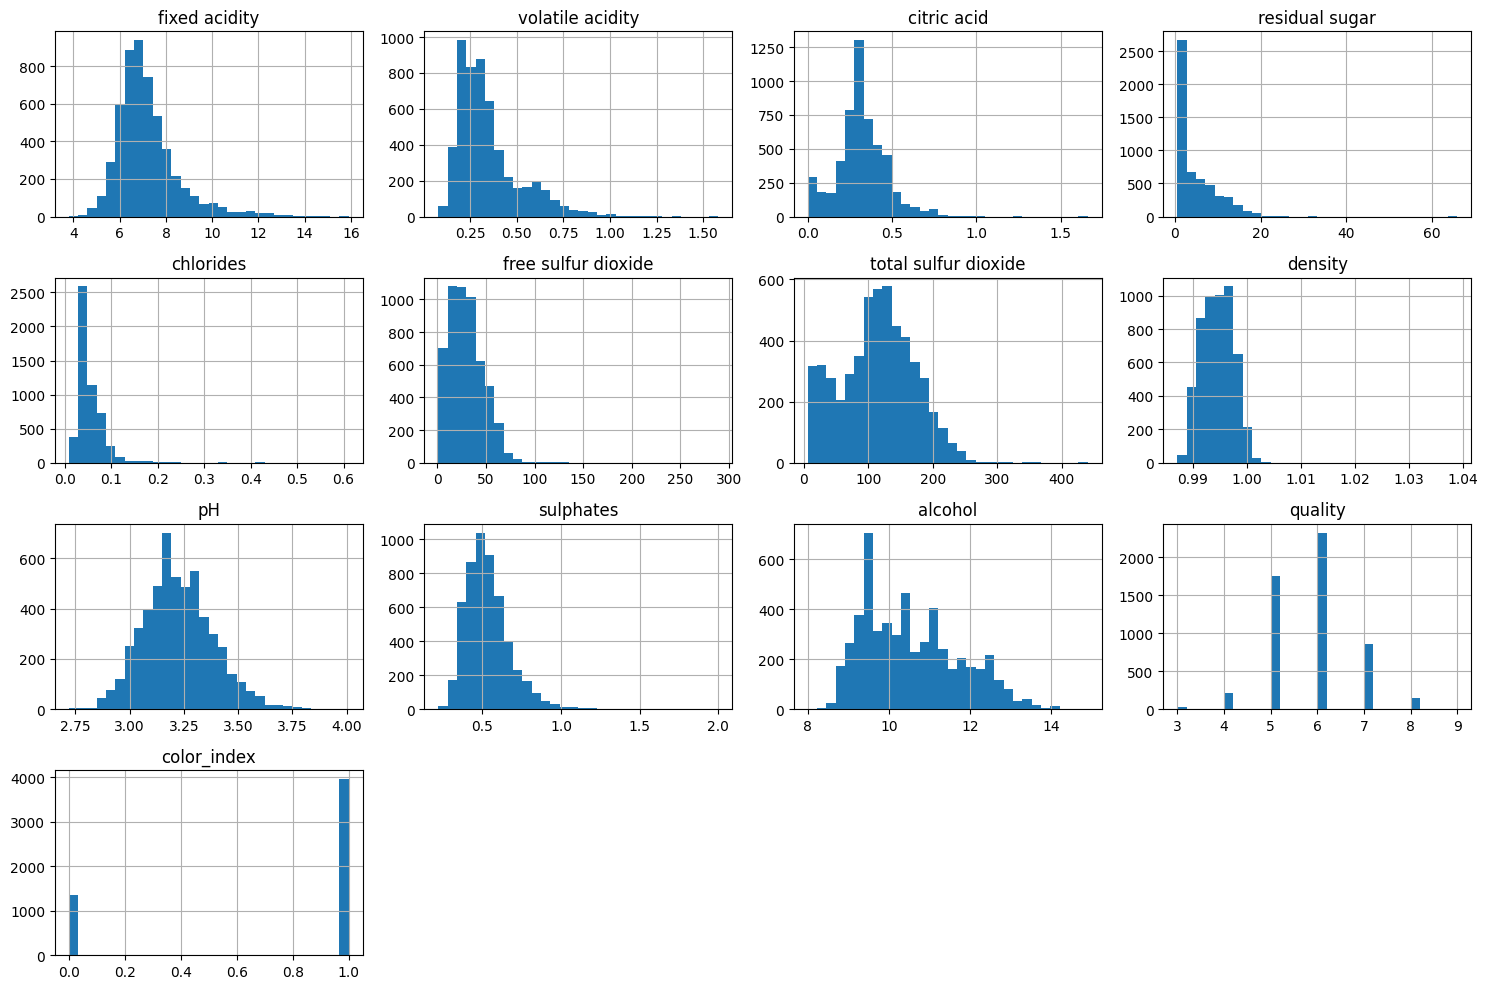

In [106]:
# Histograms to observe data distribution:

numeric_data.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

In [107]:
# Variance Inflation Factor (VIF)
#
# Colinearity measurements:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_VIF = numeric_data.drop(columns=['color_index']).assign(const=1) #const = 1 creates a column of 1's to add an intercept (needed for VIF)

vif_df = pd.DataFrame({
    "feature": X_VIF.columns,
    "VIF": [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
})

print(vif_df)

# There doesn't appear to be any highly multicolinear columns (apart from 'density', VIF ~ 14)
# Numbers are higher when 'color_index' is used

                 feature           VIF
0          fixed acidity  4.894799e+00
1       volatile acidity  2.032674e+00
2            citric acid  1.654919e+00
3         residual sugar  6.481531e+00
4              chlorides  1.633497e+00
5    free sulfur dioxide  2.164336e+00
6   total sulfur dioxide  2.971476e+00
7                density  1.497446e+01
8                     pH  2.495732e+00
9              sulphates  1.574175e+00
10               alcohol  4.764894e+00
11               quality  1.444099e+00
12                 const  1.635576e+06


<h4>Preparing the Data for Modelling</h4>

In [108]:
# Define predictor (X) and target (Y) variables
# We want to predict the wine quality based on

X = data.drop(["quality"],axis=1)
Y = data['quality']

In [109]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_index
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [110]:
Y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [111]:
# Standard Scaling:
# Seems to be lots of outliers, so will use RobustScaler() as opposed to StandardScaler()

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_scaled = pd.DataFrame(rs.fit_transform(X), columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_index
0,0.307692,2.222222,-1.9375,-0.140351,1.035714,-0.68,-1.034700,0.689278,1.363636,0.294118,-0.526316,-1.0
1,0.615385,3.222222,-1.9375,-0.017544,1.821429,-0.12,-0.618297,0.470460,-0.045455,1.000000,-0.315789,-1.0
2,0.615385,2.555556,-1.6875,-0.070175,1.607143,-0.52,-0.782334,0.514223,0.227273,0.823529,-0.315789,-1.0
3,3.230769,-0.111111,1.5625,-0.140351,1.000000,-0.44,-0.706625,0.733042,-0.227273,0.411765,-0.315789,-1.0
4,0.307692,2.000000,-1.9375,-0.157895,1.000000,-0.60,-0.958991,0.689278,1.363636,0.294118,-0.526316,-1.0


In [112]:
# Splitting into training and testing sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=27)

<h4> Training the Model

In [113]:
# We will use three different linear regression models: simple, ridge and lasso. Their performance will be evaluated using mean squared error (MSE) and pearson (R2) score.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


models = {"Linear Regression": LinearRegression(),"Ridge Regression": Ridge(alpha=1.0),"Lasso Regression": Lasso(alpha=0.1)}

performance = {}
predictions={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = [y_pred]
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {"MSE": mse, "R² Score": r2}

# Output of performance metrics:
performance = pd.DataFrame(performance).T
performance.head()


,MSE,R² Score
Linear Regression,0.545325,0.317978
Ridge Regression,0.545290,0.318022
Lasso Regression,0.610160,0.236890


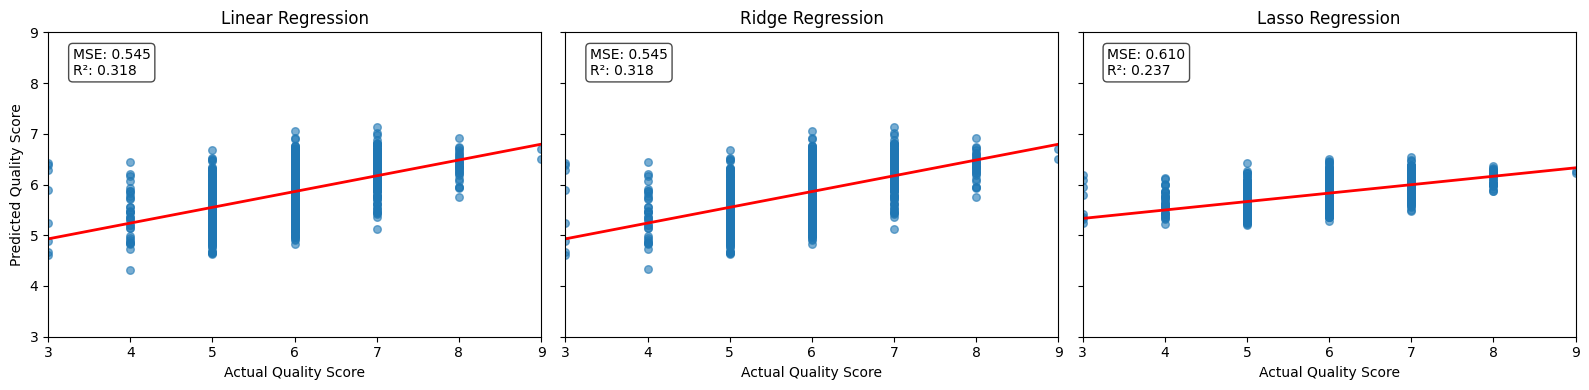

In [114]:
# Predicted vs Actual scatter plots with best-fit lines and performance labels
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

model_names = list(models.keys())

# Prepare global limits for consistent axes across plots
pred_arrays = []
for mn in model_names:
    preds = predictions[mn]
    y_pred = np.asarray(preds[0]) if isinstance(preds, list) else np.asarray(preds)
    pred_arrays.append(y_pred)

all_vals_min = min(y_test.min(), *(p.min() for p in pred_arrays))
all_vals_max = max(y_test.max(), *(p.max() for p in pred_arrays))

for ax, mn, y_pred in zip(axes, model_names, pred_arrays):
    sns.regplot(
        x=y_test.values,
        y=y_pred,
        ax=ax,
        ci=None,
        scatter_kws={"alpha": 0.6, "s": 30},
        line_kws={"color": "red", "lw": 2},
    )
    ax.set_title(mn)
    ax.set_xlim(all_vals_min, all_vals_max)
    ax.set_ylim(all_vals_min, all_vals_max)
    ax.set_xlabel("Actual Quality Score")
    if ax is axes[0]:
        ax.set_ylabel("Predicted Quality Score")
    else:
        ax.set_ylabel("")

    # Add performance metrics
    mse_val = performance.loc[mn, "MSE"]
    r2_val = performance.loc[mn, "R² Score"]
    ax.text(
        0.05,
        0.95,
        f"MSE: {mse_val:.3f}\nR²: {r2_val:.3f}",
        transform=ax.transAxes,
        va="top",
        ha="left",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
    )

plt.tight_layout()
plt.show()

In [ ]:
# The high MSE (~0.5) and low R2 scores suggest that linear regression isn't particularly accurate for predicting quality score.
# Quality score is likely a subjective quantitative score (but could be interprted as ordinal categorical variable as the data type is an integer)...

<h4> Making the 'quality' continuous, not categorical:

In [127]:
# Convert the quality score into a continuous (not categorical) variable via int64 -> float. May help to reduce the bin 'clustering' we observe in the ln[30] charts.

red_data = pd.read_csv("winequality-red.csv")
white_data = pd.read_csv("winequality-white.csv")
red_data = red_data.assign(color="Red")
white_data = white_data.assign(color="White")

cq_data = pd.concat([red_data, white_data], ignore_index=True)
cq_data = cq_data.drop_duplicates()
cq_data.loc[:, 'color_index'] = cq_data['color'].astype(dtype='category').cat.codes
cq_data = cq_data.drop(['color'],axis=1)

cq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color_index           5320 non-null   int8   
dtypes: float64(11), int64(1), int8(1)
memory usage: 545.5 KB


In [128]:
cq_data['quality'] = cq_data['quality'].astype('float64') #Convert
cq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   float64
 12  color_index           5320 non-null   int8   
dtypes: float64(12), int8(1)
memory usage: 545.5 KB


In [ ]:
# Won't bother with EDA here as we have only converted a datatype

# Separate variables: 'Xcq' = X continuous quality. 'ycq' = ...
Xcq = cq_data.drop(["quality"],axis=1)
ycq = cq_data['quality']

# Scaling:
Xcq_scaled = pd.DataFrame(rs.fit_transform(Xcq), columns=Xcq.columns)

# Splitting:
Xcq_train, Xcq_test, ycq_train, ycq_test = train_test_split(Xcq_scaled, ycq, test_size=0.2, random_state=27)

# Training:

cq_models = {"Linear Regression": LinearRegression(),"Ridge Regression": Ridge(alpha=1.0),"Lasso Regression": Lasso(alpha=0.1)}

cq_performance = {}
cq_predictions={}



for name, model in cq_models.items():
    model.fit(Xcq_train, ycq_train)
    ycq_pred = model.predict(Xcq_test)
    cq_predictions[name] = [ycq_pred]
    mse = mean_squared_error(ycq_test, ycq_pred)
    r2 = r2_score(ycq_test, ycq_pred)
    cq_performance[name] = {"MSE": mse, "R² Score": r2}

# Output of performance metrics:
cq_performance = pd.DataFrame(cq_performance).T
cq_performance.head()

,MSE,R² Score
Linear Regression,0.545325,0.317978
Ridge Regression,0.545290,0.318022
Lasso Regression,0.610160,0.236890


In [119]:
#compared to the previous metrics:
performance.head()

,MSE,R² Score
Linear Regression,0.545325,0.317978
Ridge Regression,0.545290,0.318022
Lasso Regression,0.610160,0.236890


In [131]:
# Doesn' appear to make a difference...